In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
with pd.ExcelFile('dane otworowe.xlsx') as xls:
    L1_df = pd.read_excel(xls, 'L-1')
    K1_df = pd.read_excel(xls, 'K-1')
    O2_df = pd.read_excel(xls, 'O-2')

In [27]:
L1_df.set_index('DEPT', inplace=True)
K1_df.set_index('DEPT', inplace=True)
O2_df.set_index('DEPT', inplace=True)

In [28]:
L1_df.head()

,LLS,LLD,DT,RHOB,Pe,NPHI,GR,GKUT,GRKT,POTA,...,VSH,VLIM,VDOL,VKWA,VPIR,VKER,DPEQ,DSEQ,RHEQ,Litostratygrafia
DEPT,,,,,,,,,,,,,,,,,,,,,
2693.0,14.9295,12.3371,NaN,2.6711,3.8221,19.3160,121.4118,93.1776,121.3947,3.1196,...,0.5625,0.1514,0,0.2249,0.0226,0,225.476,405.412,2.652,iłowców z Pel fm
2693.1,13.6370,11.8990,NaN,2.6588,3.8461,19.2650,119.5263,91.9091,119.6628,3.0814,...,0.5575,0.1621,0,0.2199,0.0222,0,225.107,408.027,2.644,iłowców z Pel fm
2693.2,13.9711,12.6411,NaN,2.6548,3.9091,18.9181,115.8859,87.0163,112.7118,2.9110,...,0.5480,0.1749,0,0.2174,0.0219,0,224.229,409.679,2.637,iłowców z Pel fm
2693.3,14.7672,13.5447,NaN,2.6600,4.0309,18.2650,109.0175,83.7801,108.3159,2.7974,...,0.5209,0.2107,0,0.2112,0.0211,0,222.989,409.413,2.636,iłowców z Pel fm
2693.4,16.0459,14.3166,NaN,2.6657,4.1898,17.4383,100.7110,79.9584,103.4099,2.6649,...,0.5026,0.2277,0,0.2123,0.0216,0,221.523,408.112,2.640,iłowców z Pel fm


In [29]:
L1_df = L1_df[['LLS', 'LLD', 'DT', 'RHOB', 'Pe', 'NPHI', 'GR', 'GKUT', 'GRKT', 'POTA',
       'THOR', 'URAN']]
K1_df = K1_df[['LLS', 'LLD', 'DT', 'RHOB', 'Pe', 'NPHI', 'GR', 'GKUT', 'GRKT', 'POTA',
       'THOR', 'URAN']]
O2_df = O2_df[['LLS', 'LLD', 'DT', 'RHOB', 'Pe', 'NPHI', 'GR', 'GKUT', 'GRKT', 'POTA',
       'THOR', 'URAN']]

In [30]:
L1_df.columns

Index(['LLS', 'LLD', 'DT', 'RHOB', 'Pe', 'NPHI', 'GR', 'GKUT', 'GRKT', 'POTA',
       'THOR', 'URAN'],
      dtype='object')

In [31]:
K1_df.corr()['DT']

LLS    -0.114246
LLD    -0.211791
DT      1.000000
RHOB   -0.626231
Pe     -0.576005
NPHI    0.874351
GR      0.717150
GKUT    0.627401
GRKT    0.570833
POTA    0.600205
THOR    0.487499
URAN    0.450973
Name: DT, dtype: float64

In [32]:
O2_df.corr()['DT']

LLS     0.080202
LLD     0.016998
DT      1.000000
RHOB   -0.641267
Pe     -0.584630
NPHI    0.905262
GR      0.711260
GKUT    0.757207
GRKT    0.625263
POTA    0.677947
THOR    0.487056
URAN    0.536458
Name: DT, dtype: float64

In [34]:
%matplotlib inline

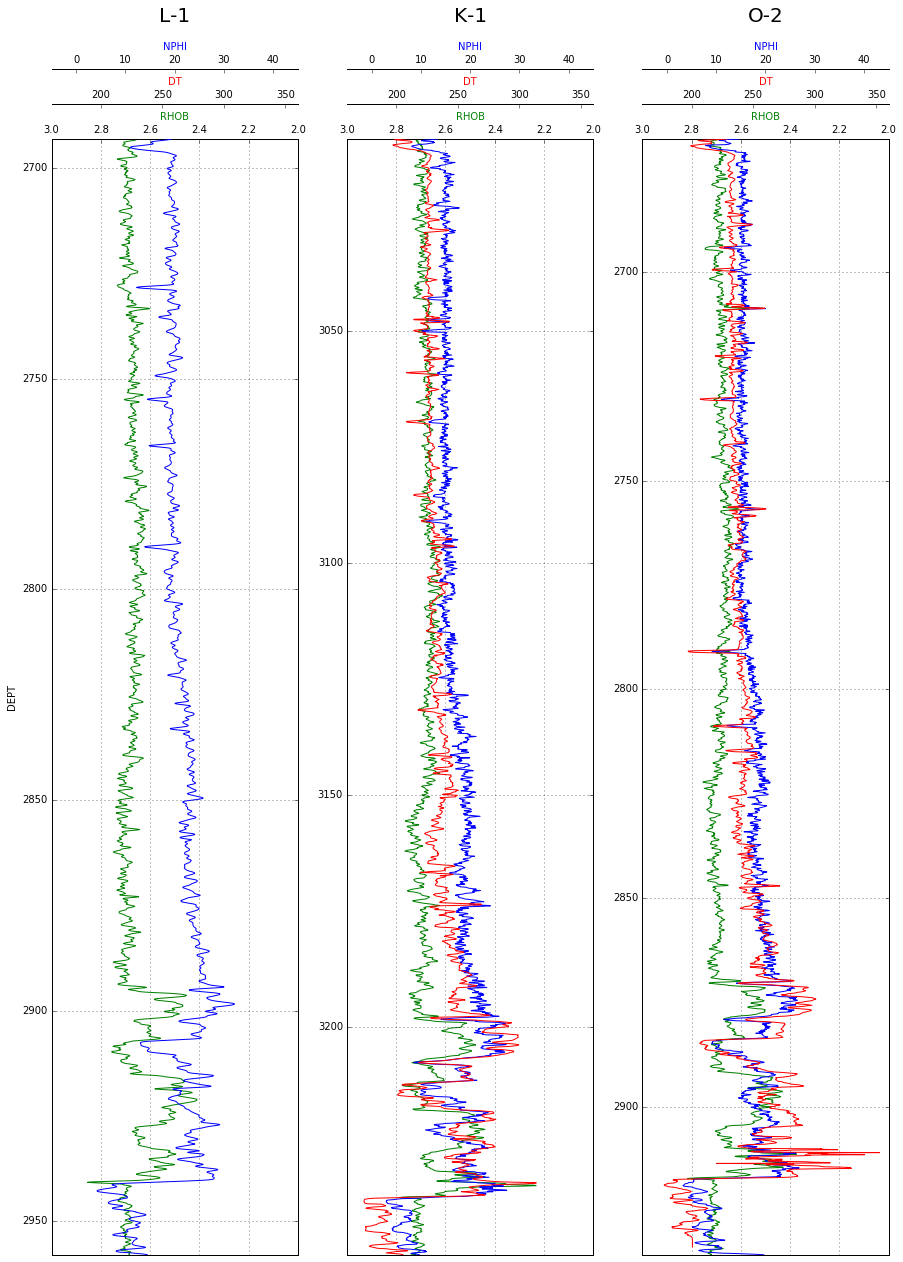

In [98]:
#wizualizacja trzech wykresów


fig = plt.figure(figsize=(15,20))

ax_L1 = plt.subplot(1, 3, 1)
ax_L1.set_title('L-1', y=1.1, fontsize = 20)

add1 = ax_L1.twiny()
add2 = ax_L1.twiny()

ax_L1.set_ylim(L1_df.index.max(), L1_df.index.min())
ax_L1.set_xlim(3, 2)
add1.set_xlim(-5, 45)
add2.set_xlim(160, 360)

ax_L1.set_ylabel("DEPT")
ax_L1.set_xlabel("RHOB")
add1.set_xlabel("NPHI")
add2.set_xlabel("DT")

crv1, = ax_L1.plot(L1_df['RHOB'], L1_df.index, 'g-', label="RHOB")
crv2, = add1.plot(L1_df['NPHI'], L1_df.index, 'b-', label="NPHI")
crv3, = add2.plot(L1_df['DT'], L1_df.index, 'r-', label="DT")

add1.spines['top'].set_position(('outward', 70))
add2.spines['top'].set_position(('outward', 35))
ax_L1.xaxis.tick_top() 
ax_L1.xaxis.set_label_position('top')

ax_L1.grid(True)

ax_L1.xaxis.label.set_color(crv1.get_color())
add1.xaxis.label.set_color(crv2.get_color())
add2.xaxis.label.set_color(crv3.get_color())


ax_K1 = plt.subplot(1,3,2)
ax_K1.set_title('K-1', y=1.1, fontsize = 20)

add1 = ax_K1.twiny()
add2 = ax_K1.twiny()

ax_K1.set_ylim(K1_df.index.max(), K1_df.index.min())
ax_K1.set_xlim(3, 2)
add1.set_xlim(-5, 45)
add2.set_xlim(160, 360)

#ax_K1.set_ylabel("DEPT")
ax_K1.set_xlabel("RHOB")
add1.set_xlabel("NPHI")
add2.set_xlabel("DT")

crv1, = ax_K1.plot(K1_df['RHOB'], K1_df.index, 'g-', label="RHOB")
crv2, = add1.plot(K1_df['NPHI'], K1_df.index, 'b-', label="NPHI")
crv3, = add2.plot(K1_df['DT'], K1_df.index, 'r-', label="DT")

add1.spines['top'].set_position(('outward', 70))
add2.spines['top'].set_position(('outward', 35))
ax_K1.xaxis.tick_top() 
ax_K1.xaxis.set_label_position('top')

ax_K1.grid(True)

ax_K1.xaxis.label.set_color(crv1.get_color())
add1.xaxis.label.set_color(crv2.get_color())
add2.xaxis.label.set_color(crv3.get_color())


ax_O2 = plt.subplot(1, 3, 3)
ax_O2.set_title('O-2', y=1.1, fontsize = 20)

add1 = ax_O2.twiny()
add2 = ax_O2.twiny()

ax_O2.set_ylim(O2_df.index.max(), O2_df.index.min())
ax_O2.set_xlim(3, 2)
add1.set_xlim(-5, 45)
add2.set_xlim(160, 360)

#ax_O2.set_ylabel("DEPT")
ax_O2.set_xlabel("RHOB")
add1.set_xlabel("NPHI")
add2.set_xlabel("DT")

crv1, = ax_O2.plot(O2_df['RHOB'], O2_df.index, 'g-', label="RHOB")
crv2, = add1.plot(O2_df['NPHI'], O2_df.index, 'b-', label="NPHI")
crv3, = add2.plot(O2_df['DT'], O2_df.index, 'r-', label="DT")

add1.spines['top'].set_position(('outward', 70))
add2.spines['top'].set_position(('outward', 35))
ax_O2.xaxis.tick_top() 
ax_O2.xaxis.set_label_position('top')

ax_O2.grid(True)

ax_O2.xaxis.label.set_color(crv1.get_color())
add1.xaxis.label.set_color(crv2.get_color())
add2.xaxis.label.set_color(crv3.get_color())

plt.show()

In [50]:
K1_df.describe()

,LLS,LLD,DT,RHOB,Pe,NPHI,GR,GKUT,GRKT,POTA,THOR,URAN
count,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2403.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000
mean,31.311042,39.450844,234.429208,2.668777,3.604282,16.451696,137.472317,157.369992,103.750264,4.079706,12.016559,4.786443
std,25.623302,29.681566,19.304964,0.056014,0.358246,3.738051,25.724786,35.043202,16.439561,0.625599,2.164171,2.530144
min,7.365600,7.741700,173.813300,2.231700,2.521700,2.960000,46.617400,50.142300,20.248500,0.741200,2.612000,0.196300
25%,20.864725,26.367425,226.325675,2.659225,3.395725,14.780000,130.144800,149.558825,98.027425,3.856900,11.202150,3.285525
50%,25.807350,33.165350,231.205400,2.678500,3.558000,15.935000,139.493500,158.171500,104.764450,4.122850,12.036500,4.667300
75%,30.244300,39.082525,242.087775,2.698700,3.755800,18.890000,145.922700,165.118900,112.322300,4.347025,13.205800,5.677925
max,364.255600,359.406000,313.810400,2.782400,4.905900,27.440000,290.817900,553.054400,242.996300,9.370600,29.035300,25.834000
